In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()##upload kaggle.json file

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"mohammedatifali","key":"99d5c0fb35b5ca1cb4230e21968c41f8"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! kaggle competitions download -c tabular-playground-series-aug-2022

tabular-playground-series-aug-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip tabular-playground-series-aug-2022.zip 

Archive:  tabular-playground-series-aug-2022.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
#pip install vaex

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
train=pd.read_csv('train.csv')

In [8]:
train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


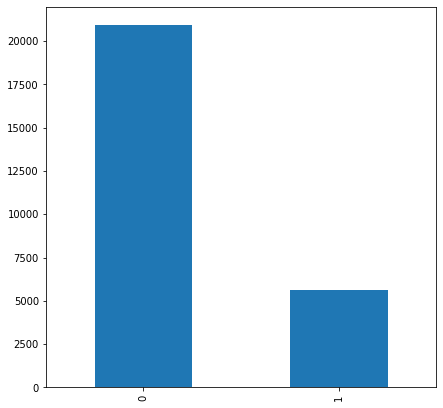

In [9]:
train['failure'].value_counts().plot(kind='bar',figsize=(7,7))
plt.show()

In [10]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [11]:
test=pd.read_csv('test.csv')

In [12]:
test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20775 non-null  int64  
 1   product_code    20775 non-null  object 
 2   loading         20552 non-null  float64
 3   attribute_0     20775 non-null  object 
 4   attribute_1     20775 non-null  object 
 5   attribute_2     20775 non-null  int64  
 6   attribute_3     20775 non-null  int64  
 7   measurement_0   20775 non-null  int64  
 8   measurement_1   20775 non-null  int64  
 9   measurement_2   20775 non-null  int64  
 10  measurement_3   20446 non-null  float64
 11  measurement_4   20366 non-null  float64
 12  measurement_5   20267 non-null  float64
 13  measurement_6   20151 non-null  float64
 14  measurement_7   20055 non-null  float64
 15  measurement_8   19929 non-null  float64
 16  measurement_9   19871 non-null  float64
 17  measurement_10  19708 non-null 

In [14]:
train.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [15]:
train=train.drop(columns='id')

In [16]:
train_num=train.select_dtypes(exclude='object')

In [17]:
train_cat=train.select_dtypes(include='object')

In [18]:
train_cat.head()

,product_code,attribute_0,attribute_1
0,A,material_7,material_8
1,A,material_7,material_8
2,A,material_7,material_8
3,A,material_7,material_8
4,A,material_7,material_8


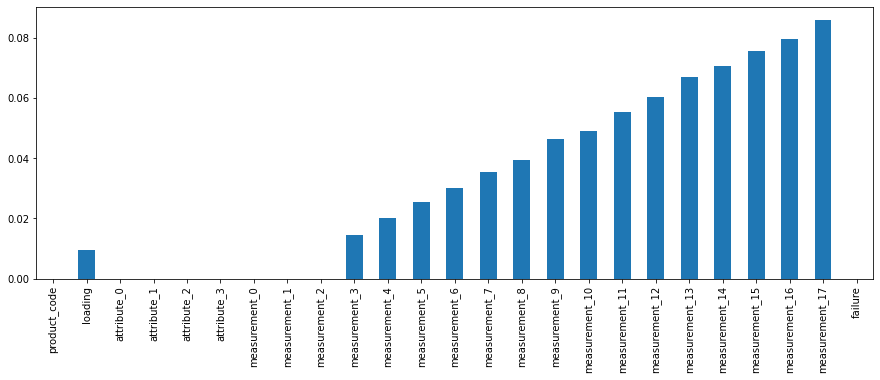

In [19]:
plt.figure(figsize=(15,5))
train.isnull().mean().plot(kind='bar')
plt.show()

In [20]:
from sklearn.feature_selection import VarianceThreshold

In [21]:
var=VarianceThreshold(threshold=0.05)

In [22]:
var.fit(train_num)

VarianceThreshold(threshold=0.05)

In [23]:
imp_num_col=train_num.columns[var.get_support()].tolist()

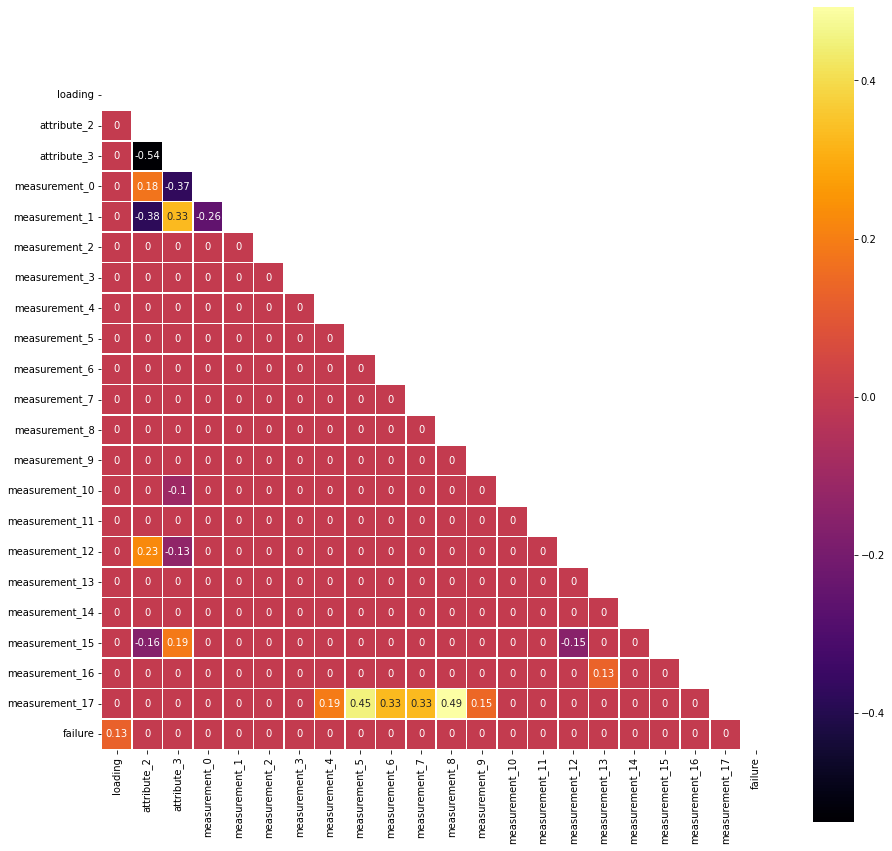

In [24]:
plt.figure(figsize=(15,15))
corr=train_num.corr()
corr[(corr<0.1) & (corr>-0.1)]=0
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(data=corr,mask=mask,cmap='inferno',square=True,annot=True,linewidth=0.6,edgecolor='w')
plt.show()

In [25]:
test.drop(columns=['id'],inplace=True)

In [26]:
train_num.drop(columns=['failure'],inplace=True)

In [27]:
train_nan_col=train_num.columns[train_num.isnull().mean()>0].tolist()

In [28]:
train_num.columns

Index(['loading', 'attribute_2', 'attribute_3', 'measurement_0',
       'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4',
       'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8',
       'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12',
       'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16',
       'measurement_17'],
      dtype='object')

In [29]:
train_nan_col_impute=[i+'_impute' for i in train_nan_col]

In [30]:
train_nan_col_impute

['loading_impute',
 'measurement_3_impute',
 'measurement_4_impute',
 'measurement_5_impute',
 'measurement_6_impute',
 'measurement_7_impute',
 'measurement_8_impute',
 'measurement_9_impute',
 'measurement_10_impute',
 'measurement_11_impute',
 'measurement_12_impute',
 'measurement_13_impute',
 'measurement_14_impute',
 'measurement_15_impute',
 'measurement_16_impute',
 'measurement_17_impute']

In [31]:
train_num[train_nan_col_impute]=train_num[train_nan_col]

In [32]:
train_num.columns

Index(['loading', 'attribute_2', 'attribute_3', 'measurement_0',
       'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4',
       'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8',
       'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12',
       'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16',
       'measurement_17', 'loading_impute', 'measurement_3_impute',
       'measurement_4_impute', 'measurement_5_impute', 'measurement_6_impute',
       'measurement_7_impute', 'measurement_8_impute', 'measurement_9_impute',
       'measurement_10_impute', 'measurement_11_impute',
       'measurement_12_impute', 'measurement_13_impute',
       'measurement_14_impute', 'measurement_15_impute',
       'measurement_16_impute', 'measurement_17_impute'],
      dtype='object')

In [33]:
train_num.isnull().mean()*100

loading                  0.940911
attribute_2              0.000000
attribute_3              0.000000
measurement_0            0.000000
measurement_1            0.000000
measurement_2            0.000000
measurement_3            1.433948
measurement_4            2.024840
measurement_5            2.544223
measurement_6            2.995860
measurement_7            3.526534
measurement_8            3.944298
measurement_9            4.617990
measurement_10           4.892736
measurement_11           5.525028
measurement_12           6.025593
measurement_13           6.676703
measurement_14           7.053067
measurement_15           7.561159
measurement_16           7.941287
measurement_17           8.596161
loading_impute           0.940911
measurement_3_impute     1.433948
measurement_4_impute     2.024840
measurement_5_impute     2.544223
measurement_6_impute     2.995860
measurement_7_impute     3.526534
measurement_8_impute     3.944298
measurement_9_impute     4.617990
measurement_10

In [34]:
def impute_nan_col(df,col):
  df[col][df[col].isnull()]=df[col].dropna().sample(df[col].isnull().sum()).values
  return df[col]

In [35]:
for i in train_nan_col:
  impute_nan_col(train_num,i)

In [36]:
train_num.isnull().sum()

loading                     0
attribute_2                 0
attribute_3                 0
measurement_0               0
measurement_1               0
measurement_2               0
measurement_3               0
measurement_4               0
measurement_5               0
measurement_6               0
measurement_7               0
measurement_8               0
measurement_9               0
measurement_10              0
measurement_11              0
measurement_12              0
measurement_13              0
measurement_14              0
measurement_15              0
measurement_16              0
measurement_17              0
loading_impute            250
measurement_3_impute      381
measurement_4_impute      538
measurement_5_impute      676
measurement_6_impute      796
measurement_7_impute      937
measurement_8_impute     1048
measurement_9_impute     1227
measurement_10_impute    1300
measurement_11_impute    1468
measurement_12_impute    1601
measurement_13_impute    1774
measuremen

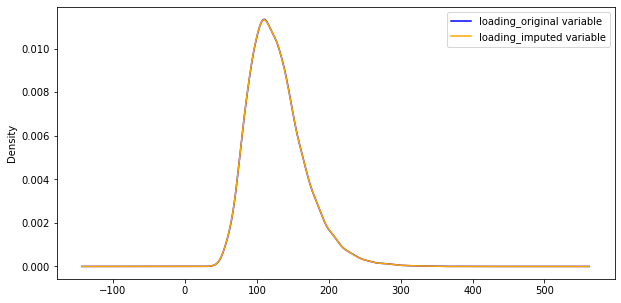

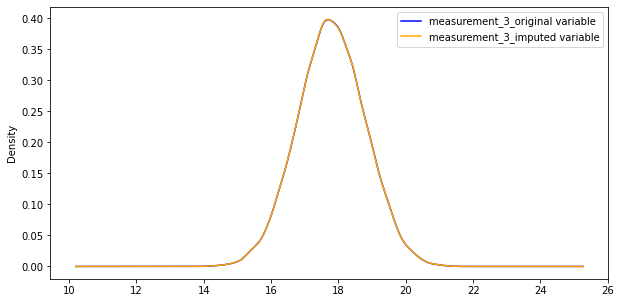

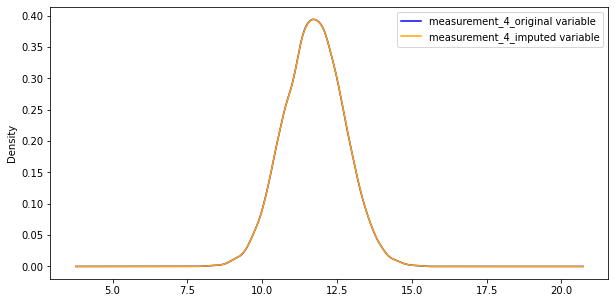

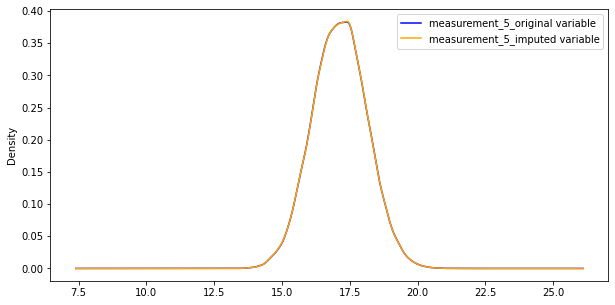

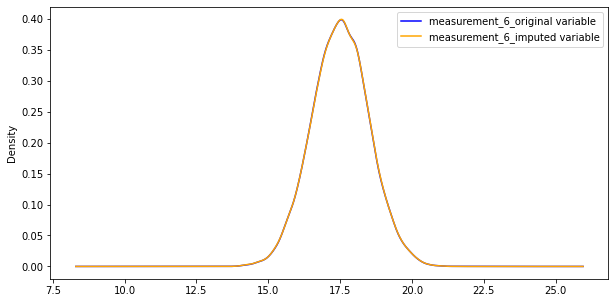

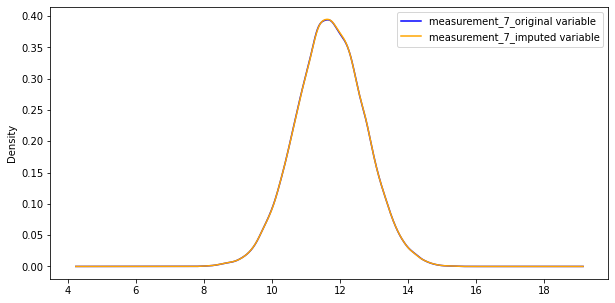

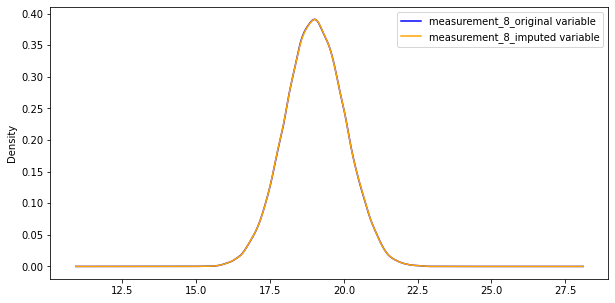

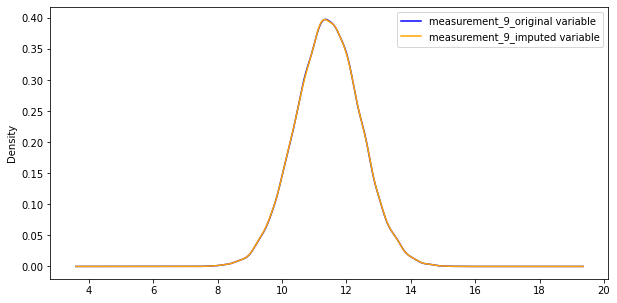

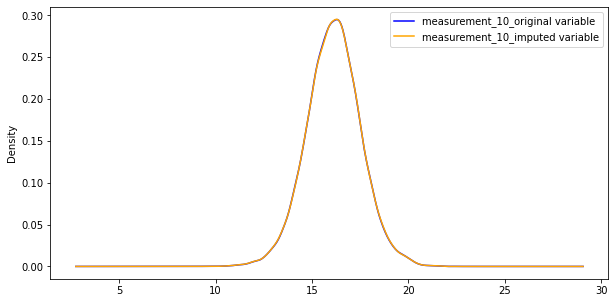

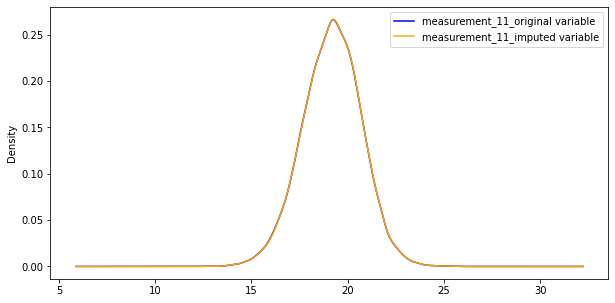

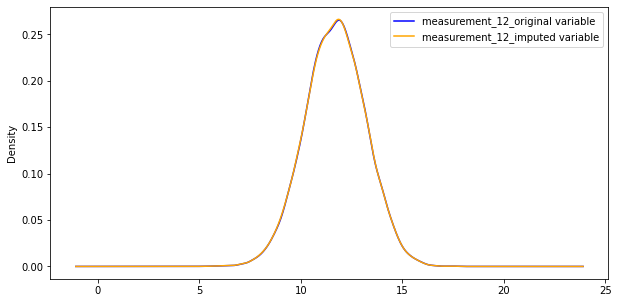

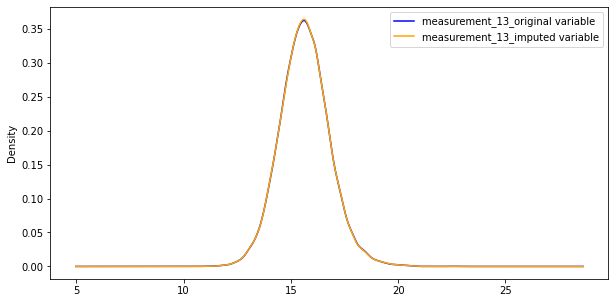

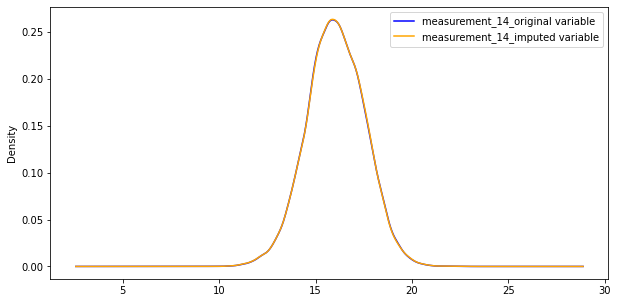

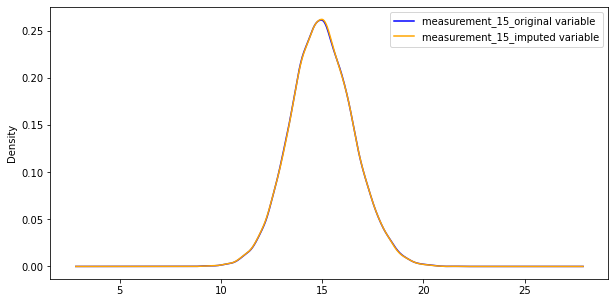

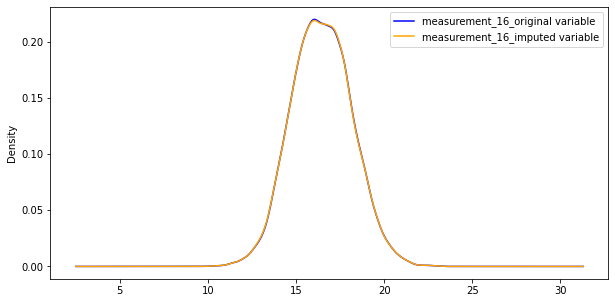

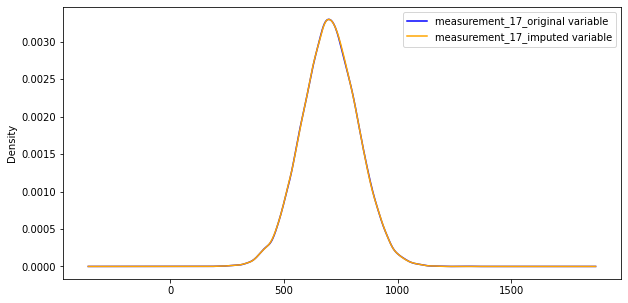

In [37]:
for i in train_nan_col:
  fig=plt.figure(figsize=[10,5])
  ax=fig.add_subplot(111)
  train_num[i].plot(kind='kde',ax=ax,color='blue')
  train_num[i+'_impute'].plot(kind='kde',ax=ax,color='orange')
  lines,labels=ax.get_legend_handles_labels()
  labels = [i+'_original variable', i+'_imputed variable']
  ax.legend(lines,labels,loc='best')
  plt.show()

In [38]:
train_cat.isnull().sum()

product_code    0
attribute_0     0
attribute_1     0
dtype: int64

In [39]:
test_num=test.select_dtypes(exclude='object')

In [40]:
test_cat=test.select_dtypes(include='object')

In [41]:
test_num.isnull().mean()*100

loading           1.073406
attribute_2       0.000000
attribute_3       0.000000
measurement_0     0.000000
measurement_1     0.000000
measurement_2     0.000000
measurement_3     1.583634
measurement_4     1.968712
measurement_5     2.445247
measurement_6     3.003610
measurement_7     3.465704
measurement_8     4.072202
measurement_9     4.351384
measurement_10    5.135981
measurement_11    5.468111
measurement_12    5.968712
measurement_13    6.271961
measurement_14    6.931408
measurement_15    7.422383
measurement_16    8.077016
measurement_17    8.375451
dtype: float64

In [42]:
test_nan_col=test_num.columns[test_num.isnull().mean()*100>0].tolist()

In [43]:
test_nan_col_impute=[i+'_impute' for i in test_nan_col]

In [44]:
test_num[test_nan_col_impute]=test_num[test_nan_col]

In [45]:
test_num.columns

Index(['loading', 'attribute_2', 'attribute_3', 'measurement_0',
       'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4',
       'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8',
       'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12',
       'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16',
       'measurement_17', 'loading_impute', 'measurement_3_impute',
       'measurement_4_impute', 'measurement_5_impute', 'measurement_6_impute',
       'measurement_7_impute', 'measurement_8_impute', 'measurement_9_impute',
       'measurement_10_impute', 'measurement_11_impute',
       'measurement_12_impute', 'measurement_13_impute',
       'measurement_14_impute', 'measurement_15_impute',
       'measurement_16_impute', 'measurement_17_impute'],
      dtype='object')

In [46]:
def impute_nan_col(df,col):
  df[col][df[col].isnull()]=df[col].dropna().sample(df[col].isnull().sum()).values
  return df[col]

In [47]:
for i in test_nan_col:
  impute_nan_col(test_num,i)

In [48]:
test_num.isnull().sum()

loading                     0
attribute_2                 0
attribute_3                 0
measurement_0               0
measurement_1               0
measurement_2               0
measurement_3               0
measurement_4               0
measurement_5               0
measurement_6               0
measurement_7               0
measurement_8               0
measurement_9               0
measurement_10              0
measurement_11              0
measurement_12              0
measurement_13              0
measurement_14              0
measurement_15              0
measurement_16              0
measurement_17              0
loading_impute            223
measurement_3_impute      329
measurement_4_impute      409
measurement_5_impute      508
measurement_6_impute      624
measurement_7_impute      720
measurement_8_impute      846
measurement_9_impute      904
measurement_10_impute    1067
measurement_11_impute    1136
measurement_12_impute    1240
measurement_13_impute    1303
measuremen

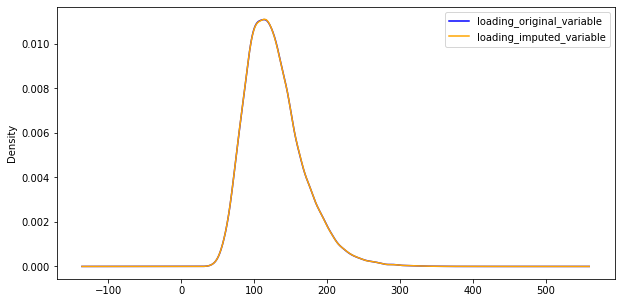

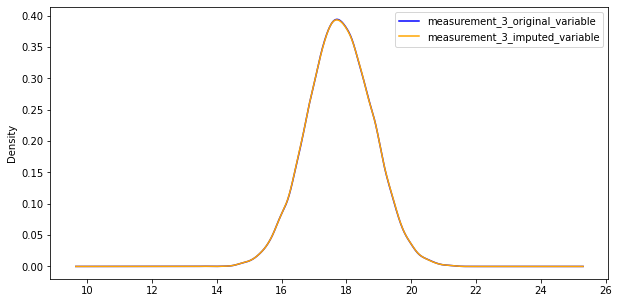

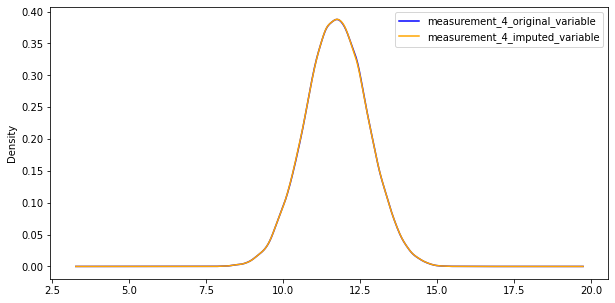

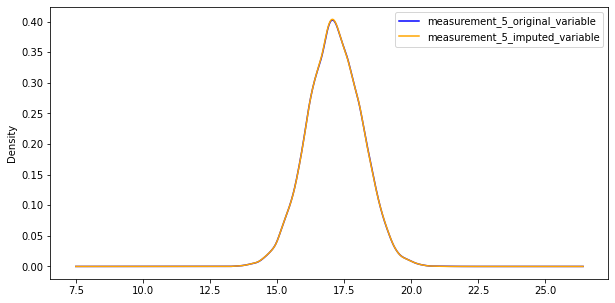

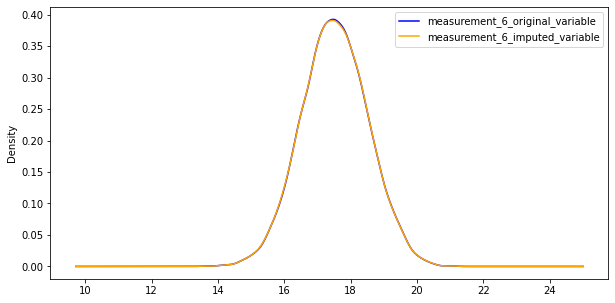

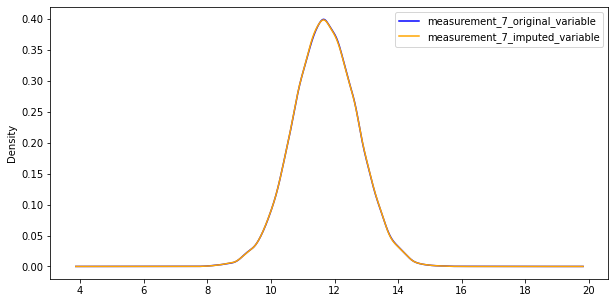

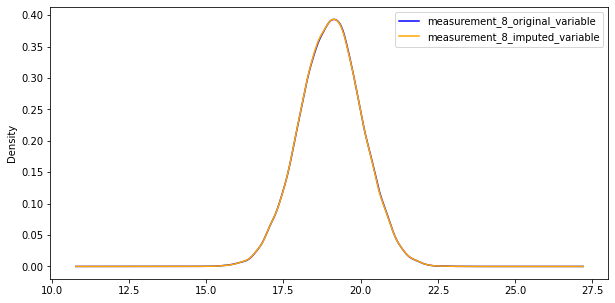

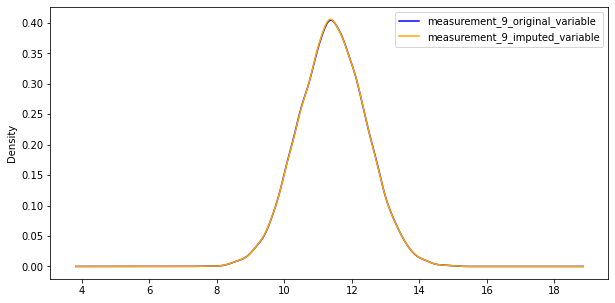

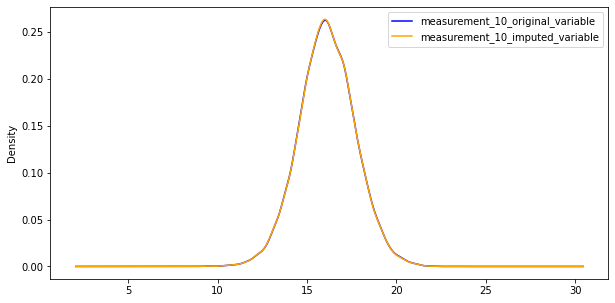

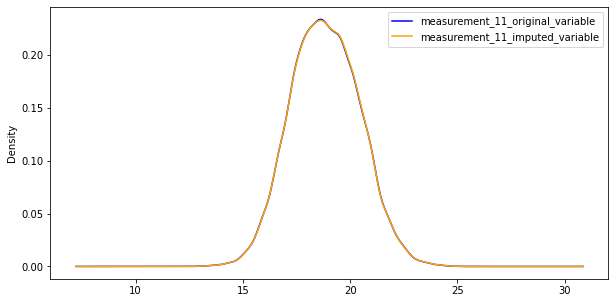

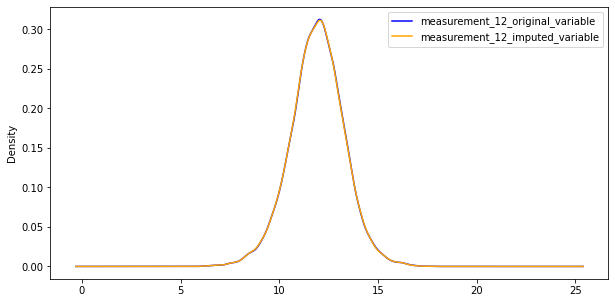

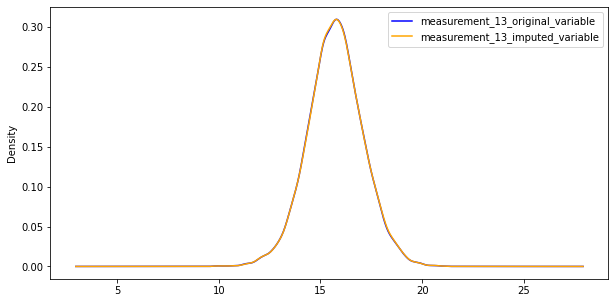

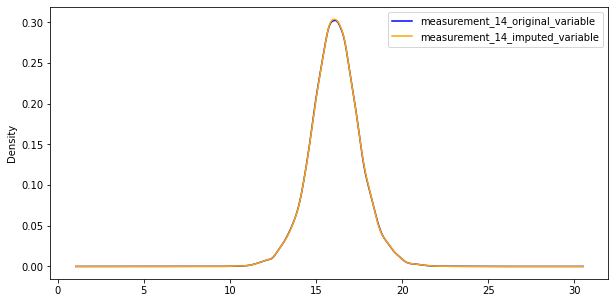

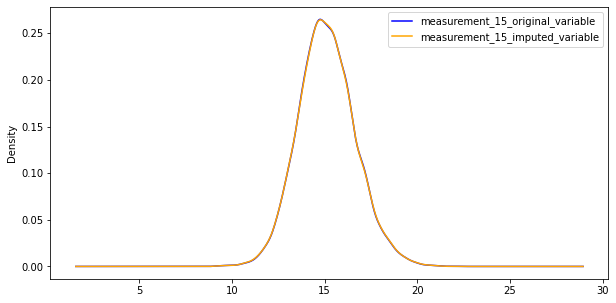

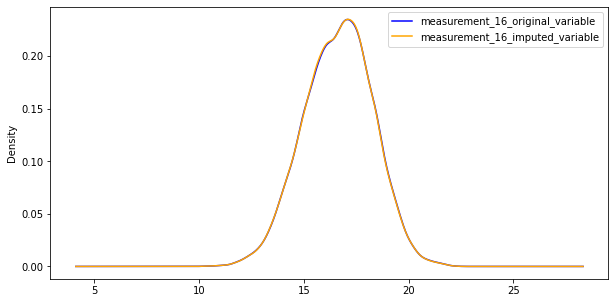

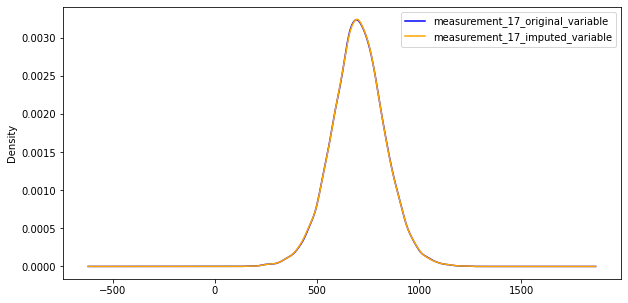

In [49]:
for i in test_nan_col:
  fig=plt.figure(figsize=[10,5])
  ax=fig.add_subplot(111)
  test_num[i].plot(kind='kde',ax=ax,color='blue')
  test_num[i+'_impute'].plot(kind='kde',ax=ax,color='orange')
  lines,labels=ax.get_legend_handles_labels()
  labels=[i+'_original_variable',i+'_imputed_variable']
  ax.legend(lines,labels,loc='best')
  plt.show()

In [50]:
test_cat.isnull().sum()

product_code    0
attribute_0     0
attribute_1     0
dtype: int64

In [51]:
train_nan_col_impute

['loading_impute',
 'measurement_3_impute',
 'measurement_4_impute',
 'measurement_5_impute',
 'measurement_6_impute',
 'measurement_7_impute',
 'measurement_8_impute',
 'measurement_9_impute',
 'measurement_10_impute',
 'measurement_11_impute',
 'measurement_12_impute',
 'measurement_13_impute',
 'measurement_14_impute',
 'measurement_15_impute',
 'measurement_16_impute',
 'measurement_17_impute']

In [52]:
test_nan_col_impute

['loading_impute',
 'measurement_3_impute',
 'measurement_4_impute',
 'measurement_5_impute',
 'measurement_6_impute',
 'measurement_7_impute',
 'measurement_8_impute',
 'measurement_9_impute',
 'measurement_10_impute',
 'measurement_11_impute',
 'measurement_12_impute',
 'measurement_13_impute',
 'measurement_14_impute',
 'measurement_15_impute',
 'measurement_16_impute',
 'measurement_17_impute']

In [53]:
train_num.drop(columns=train_nan_col_impute,inplace=True)

In [54]:
test_num.columns

Index(['loading', 'attribute_2', 'attribute_3', 'measurement_0',
       'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4',
       'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8',
       'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12',
       'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16',
       'measurement_17', 'loading_impute', 'measurement_3_impute',
       'measurement_4_impute', 'measurement_5_impute', 'measurement_6_impute',
       'measurement_7_impute', 'measurement_8_impute', 'measurement_9_impute',
       'measurement_10_impute', 'measurement_11_impute',
       'measurement_12_impute', 'measurement_13_impute',
       'measurement_14_impute', 'measurement_15_impute',
       'measurement_16_impute', 'measurement_17_impute'],
      dtype='object')

In [55]:
test_num.drop(columns=test_nan_col_impute)

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,119.57,6,4,6,9,6,19.305,10.178,17.534,18.168,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,113.51,6,4,11,8,0,17.883,11.927,17.228,16.033,...,19.368,12.032,13.998,20.903,12.473,17.468,16.708,14.776,14.102,537.037
2,112.16,6,4,8,12,4,18.475,10.481,16.619,18.189,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,112.72,6,4,8,11,10,16.518,10.888,15.293,18.592,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,208.00,6,4,14,16,8,17.808,12.693,17.678,15.814,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,144.74,9,5,0,4,9,18.465,12.570,18.146,17.089,...,18.573,11.691,17.014,19.771,11.562,17.246,15.131,15.209,16.414,696.466
20771,74.53,9,5,4,8,7,18.900,9.896,18.288,19.328,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
20772,67.73,9,5,10,11,2,18.656,13.169,18.242,17.910,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349
20773,126.15,9,5,8,16,11,16.536,11.226,18.144,17.250,...,19.575,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210


In [56]:
train_num.isnull().sum()

loading           0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [57]:
test_num.isnull().sum()

loading                     0
attribute_2                 0
attribute_3                 0
measurement_0               0
measurement_1               0
measurement_2               0
measurement_3               0
measurement_4               0
measurement_5               0
measurement_6               0
measurement_7               0
measurement_8               0
measurement_9               0
measurement_10              0
measurement_11              0
measurement_12              0
measurement_13              0
measurement_14              0
measurement_15              0
measurement_16              0
measurement_17              0
loading_impute            223
measurement_3_impute      329
measurement_4_impute      409
measurement_5_impute      508
measurement_6_impute      624
measurement_7_impute      720
measurement_8_impute      846
measurement_9_impute      904
measurement_10_impute    1067
measurement_11_impute    1136
measurement_12_impute    1240
measurement_13_impute    1303
measuremen

In [58]:
test_nan_col_impute

['loading_impute',
 'measurement_3_impute',
 'measurement_4_impute',
 'measurement_5_impute',
 'measurement_6_impute',
 'measurement_7_impute',
 'measurement_8_impute',
 'measurement_9_impute',
 'measurement_10_impute',
 'measurement_11_impute',
 'measurement_12_impute',
 'measurement_13_impute',
 'measurement_14_impute',
 'measurement_15_impute',
 'measurement_16_impute',
 'measurement_17_impute']

In [59]:
test_num.drop(columns=test_nan_col_impute,inplace=True)

In [60]:
train_num.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,...,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000
mean,127.852585,6.754046,7.240459,7.415883,8.232518,6.256568,17.792511,11.731359,17.127634,17.509628,...,19.025079,11.430846,16.116763,19.169135,11.705579,15.654210,16.047403,14.997455,16.463325,701.382904
std,39.006273,1.471852,1.456493,4.116690,4.199401,3.309109,1.001014,0.995702,0.996177,0.994819,...,1.008683,0.998001,1.402548,1.522190,1.486537,1.157213,1.490416,1.550161,1.707575,123.430293
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,...,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000
25%,100.022500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117250,11.050000,16.442000,16.838000,...,18.343000,10.757000,15.209000,18.166000,10.704250,14.889000,15.054000,13.957000,15.272000,618.936000
50%,122.450000,6.000000,8.000000,7.000000,8.000000,6.000000,17.788000,11.731000,17.131000,17.514000,...,19.021000,11.430000,16.125000,19.207000,11.720000,15.629000,16.037000,14.966000,16.435000,700.989500
75%,149.160000,8.000000,8.000000,10.000000,11.000000,8.000000,18.470000,12.408000,17.804000,18.175000,...,19.708000,12.100000,17.022000,20.205000,12.711000,16.375000,17.079750,16.018000,17.633000,784.416250
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,...,23.807000,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000


In [61]:
def outliers(data,col):
  q3=data[col].quantile(0.75)
  q1=data[col].quantile(0.25)
  iqr=q3-q1
  upper_lmt=q3+(1.5*iqr)
  lower_lmt=q1-(1.5*iqr)
  data[col]=np.where(data[col]>upper_lmt,upper_lmt,
                     np.where(data[col]<lower_lmt,lower_lmt,data[col]))
  return data[col]

In [62]:
for i in train_num.columns:
  outliers(train_num,i)

In [63]:
train_num.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,...,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000
mean,127.219252,6.754046,7.240459,7.394242,8.219044,6.220023,17.792677,11.731189,17.127346,17.509892,...,19.024784,11.430916,16.117883,19.170287,11.706750,15.648614,16.048518,14.996422,16.462498,701.367593
std,36.970223,1.471852,1.456493,4.045440,4.156102,3.201301,0.995698,0.990116,0.990965,0.988030,...,1.003215,0.991248,1.376767,1.506504,1.474927,1.128624,1.478504,1.536039,1.696938,122.341573
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,15.088125,9.013000,14.399000,14.832500,...,16.295500,8.742500,12.489500,15.107500,7.694125,12.660000,12.015375,10.865500,11.730500,370.715625
25%,100.022500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117250,11.050000,16.442000,16.838000,...,18.343000,10.757000,15.209000,18.166000,10.704250,14.889000,15.054000,13.957000,15.272000,618.936000
50%,122.450000,6.000000,8.000000,7.000000,8.000000,6.000000,17.788000,11.731000,17.131000,17.514000,...,19.021000,11.430000,16.125000,19.207000,11.720000,15.629000,16.037000,14.966000,16.435000,700.989500
75%,149.160000,8.000000,8.000000,10.000000,11.000000,8.000000,18.470000,12.408000,17.804000,18.175000,...,19.708000,12.100000,17.022000,20.205000,12.711000,16.375000,17.079750,16.018000,17.633000,784.416250
max,222.866250,9.000000,9.000000,19.000000,20.000000,14.000000,20.499125,14.445000,19.847000,20.180500,...,21.755500,14.114500,19.741500,23.263500,15.721125,18.604000,20.118375,19.109500,21.174500,1032.636625


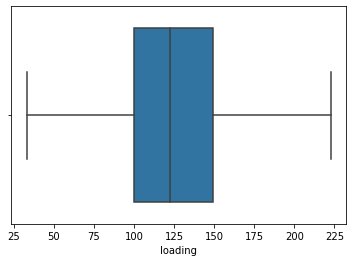

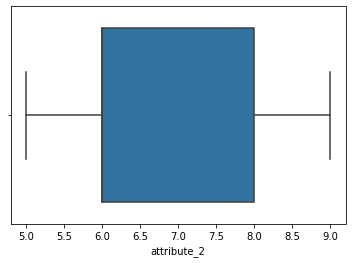

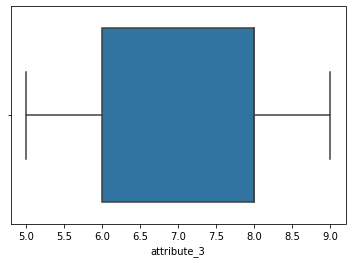

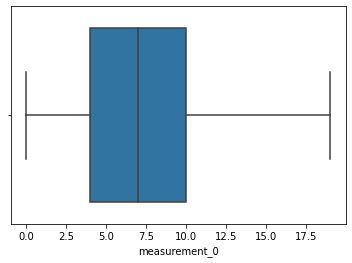

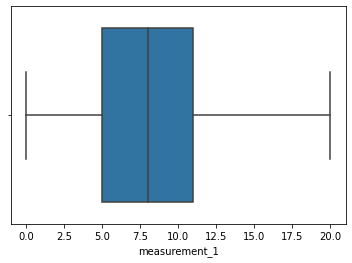

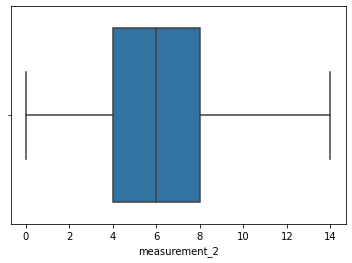

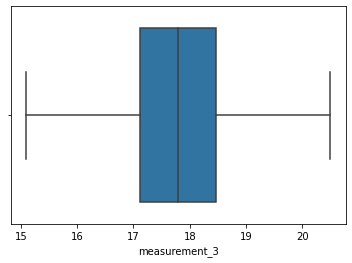

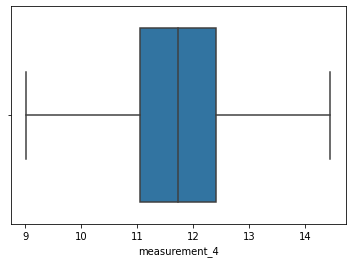

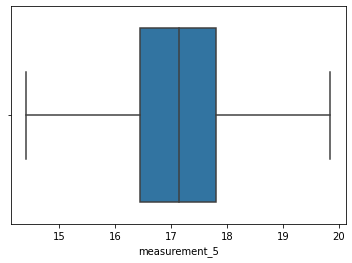

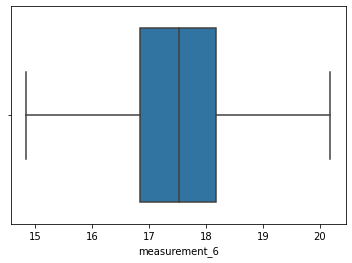

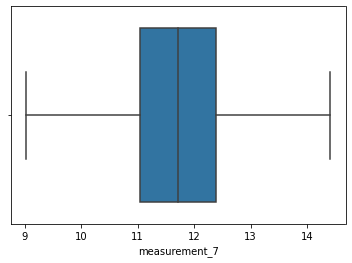

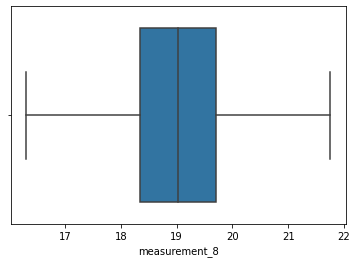

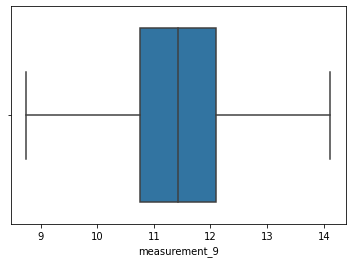

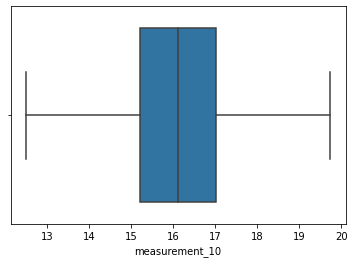

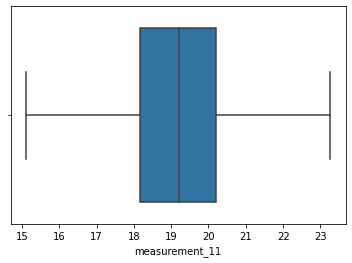

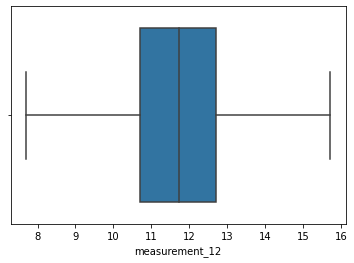

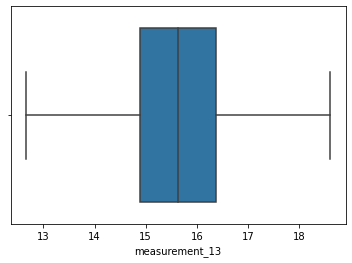

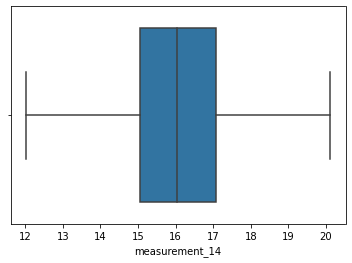

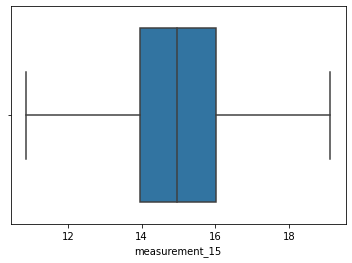

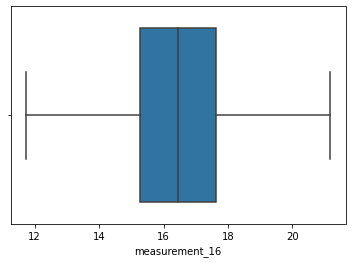

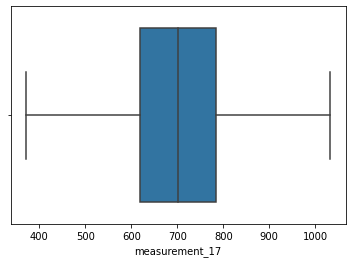

In [64]:
for i in train_num.columns:
  sns.boxplot(train_num[i])
  plt.show()

In [65]:
test_num.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,...,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000
mean,127.655193,7.733959,6.196823,7.453574,8.962407,6.126931,17.793558,11.728396,17.138406,17.516941,...,19.033602,11.418372,16.125937,18.842223,11.917602,15.731641,16.121522,15.115130,16.641176,701.628362
std,39.157101,1.308535,1.917478,4.274477,4.334200,3.835881,1.001230,1.006081,1.009316,0.999648,...,1.005794,1.000321,1.567813,1.590129,1.362468,1.355907,1.410358,1.540985,1.647444,130.154111
min,37.700000,6.000000,4.000000,0.000000,0.000000,0.000000,13.565000,7.384000,12.215000,13.539000,...,14.885000,7.578000,9.167000,13.127000,6.116000,9.209000,8.415000,8.417000,10.162000,1.671000
25%,99.495000,6.000000,4.000000,4.000000,6.000000,3.000000,17.121000,11.050000,16.455500,16.849000,...,18.352500,10.741000,15.092000,17.708000,11.074000,14.866000,15.233500,14.082000,15.513000,619.043500
50%,122.140000,7.000000,5.000000,7.000000,9.000000,6.000000,17.789000,11.730000,17.133000,17.511000,...,19.043000,11.416000,16.111000,18.804000,11.944000,15.734000,16.116000,15.059000,16.712000,701.407000
75%,148.840000,9.000000,7.000000,10.000000,12.000000,8.000000,18.477000,12.413000,17.825000,18.195000,...,19.709000,12.095000,17.158500,19.965000,12.794000,16.602000,17.000000,16.107000,17.791000,785.105500
max,385.570000,9.000000,9.000000,30.000000,33.000000,28.000000,21.389000,15.623000,21.681000,21.183000,...,23.092000,15.091000,23.354000,24.950000,18.962000,21.677000,23.140000,22.097000,22.270000,1242.786000


In [66]:
for i in test_num.columns:
  outliers(test_num,i)

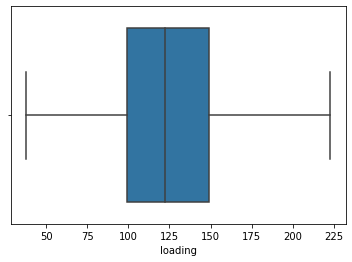

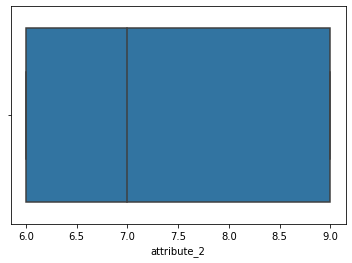

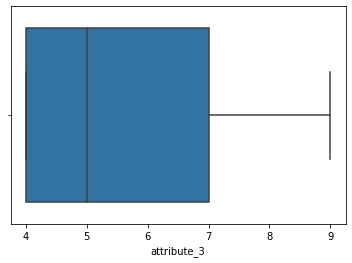

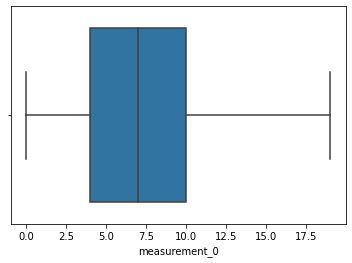

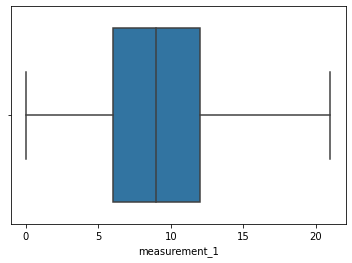

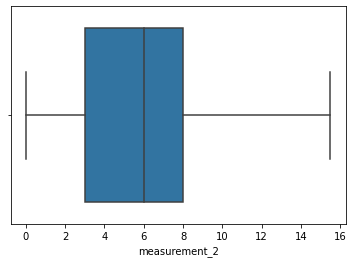

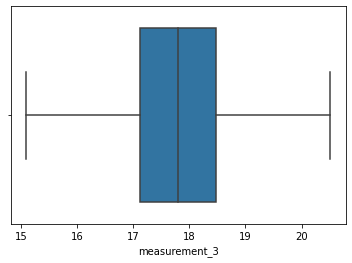

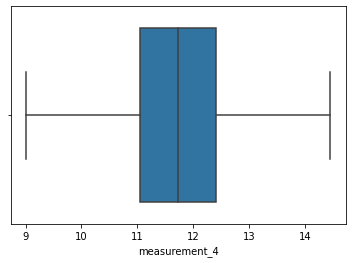

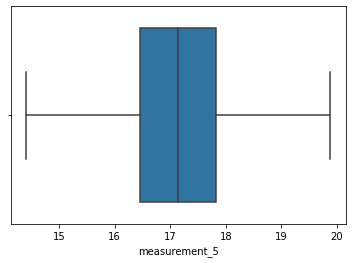

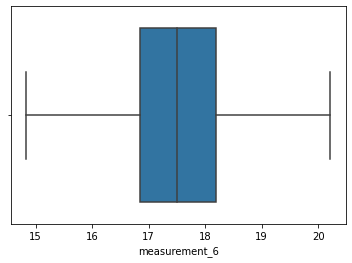

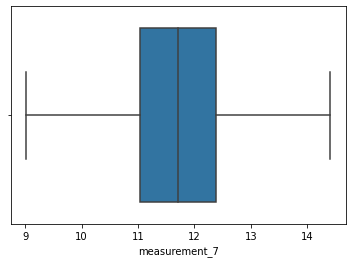

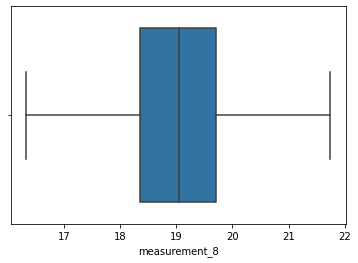

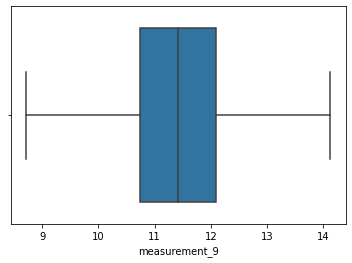

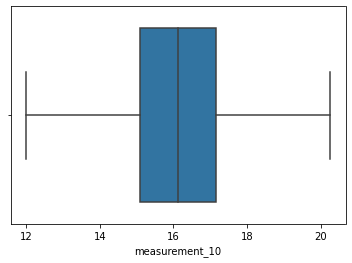

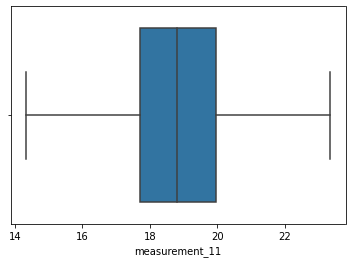

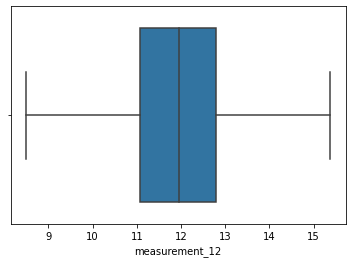

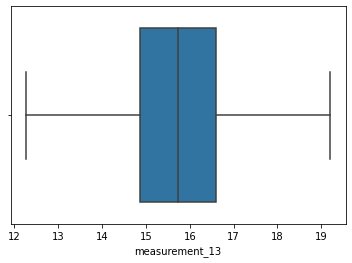

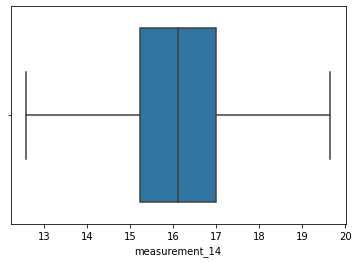

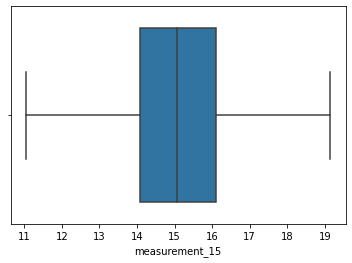

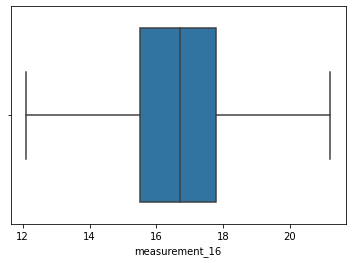

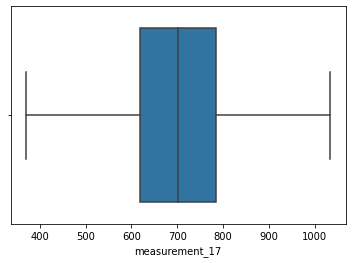

In [67]:
for i in test_num.columns:
  sns.boxplot(test_num[i])
  plt.show()

In [68]:
def gaussian_distribution(data,col):
  fig=plt.figure(figsize=[10,8])
  ax=fig.add_subplot(111)
  data[col].plot(kind='kde',ax=ax,color='blue')
  lines,labels=ax.get_legend_handles_labels()
  labels = [col]
  ax.legend(lines,labels,loc='best')
  plt.show()

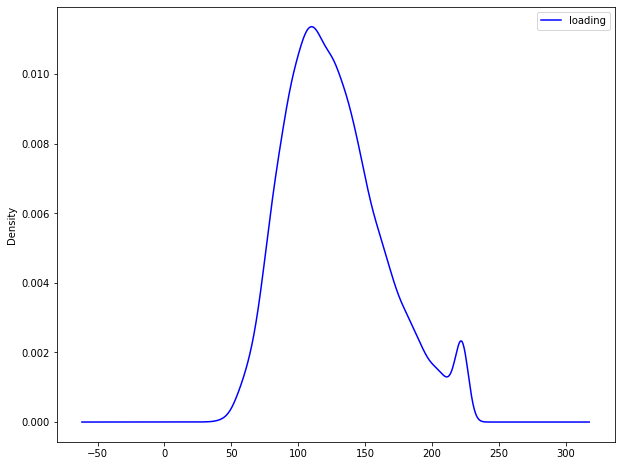

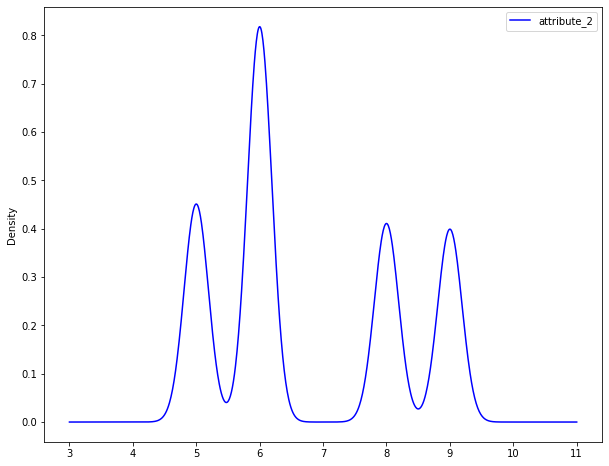

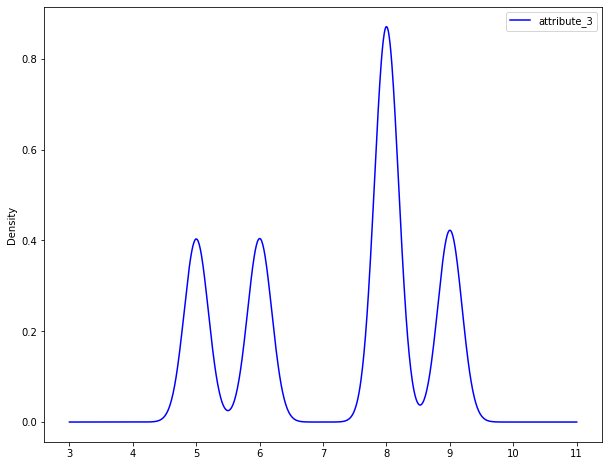

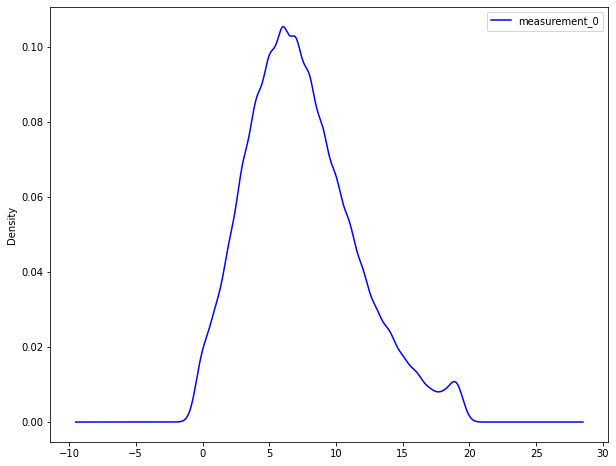

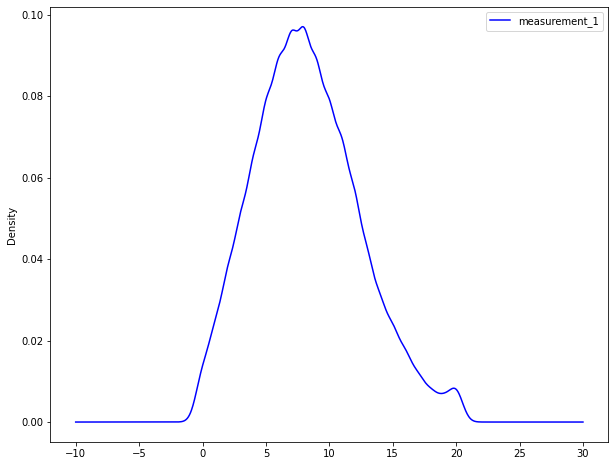

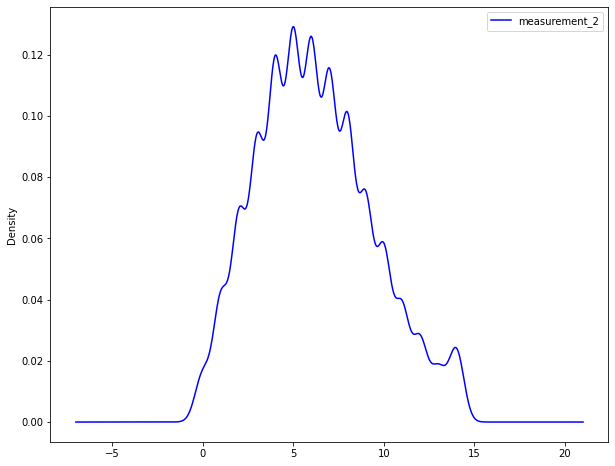

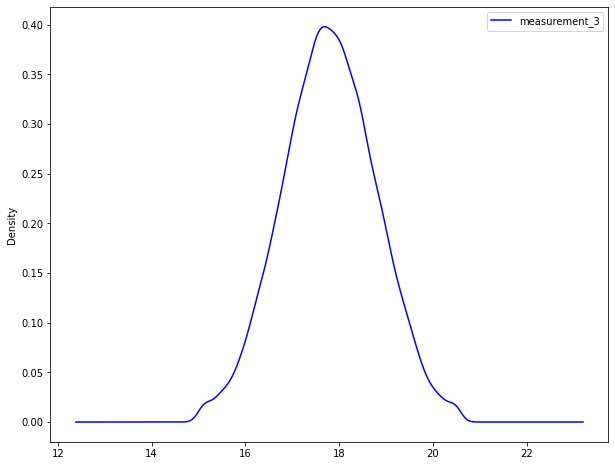

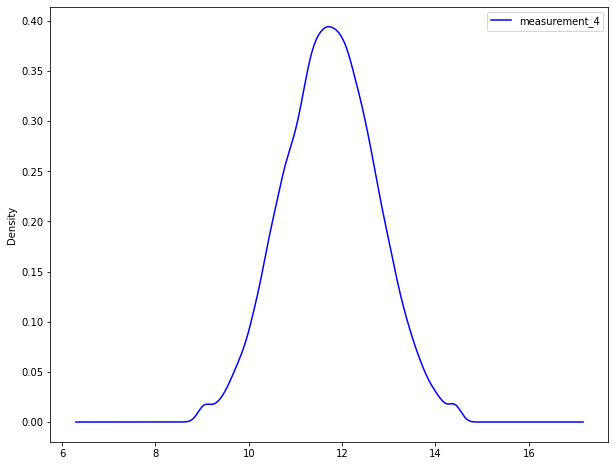

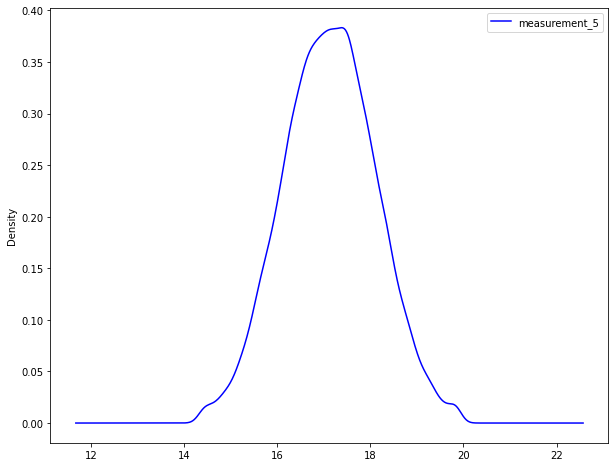

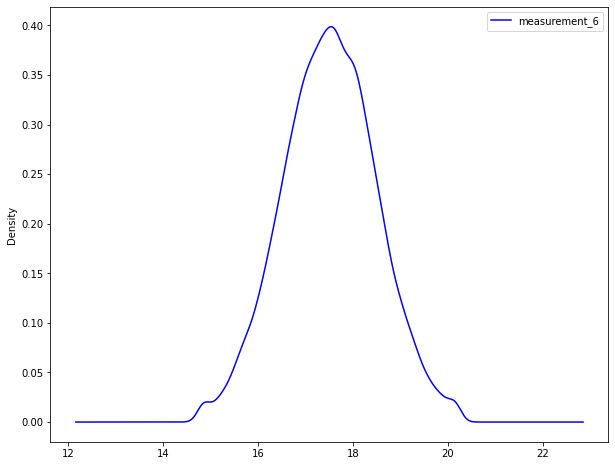

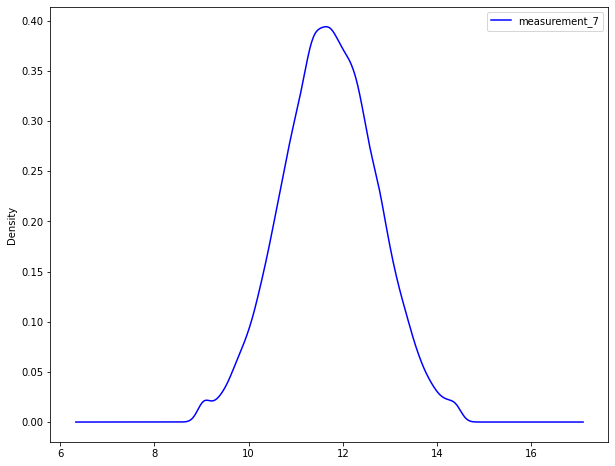

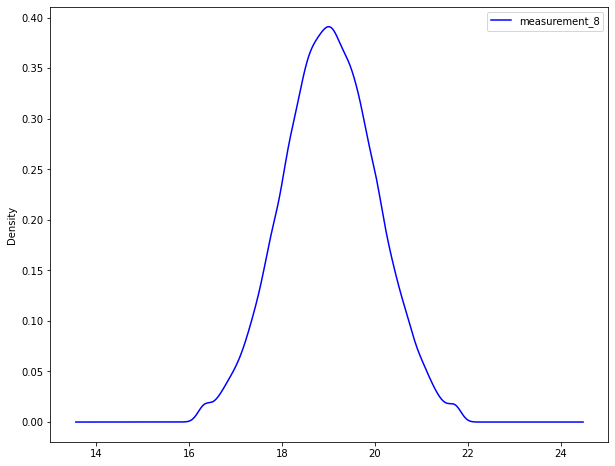

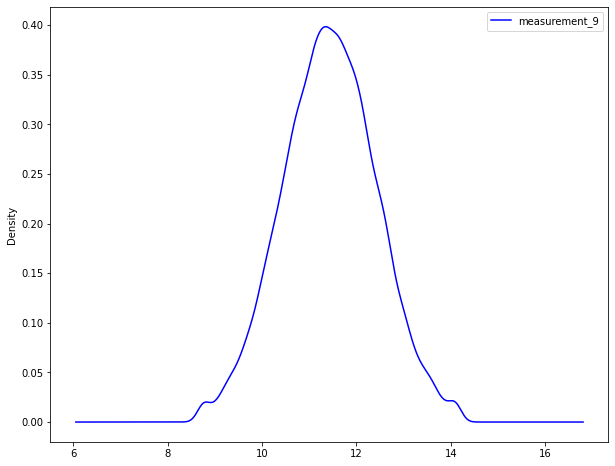

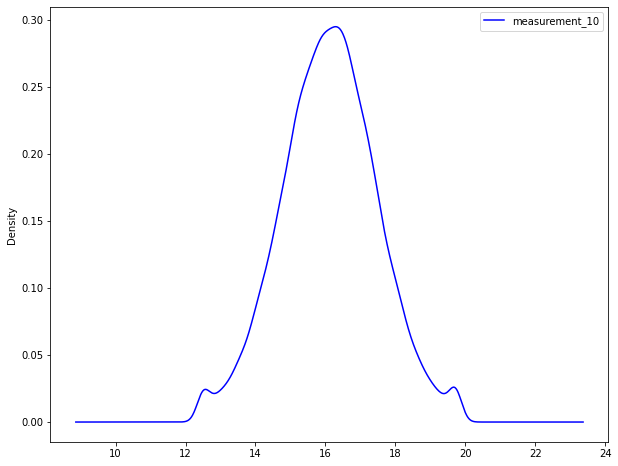

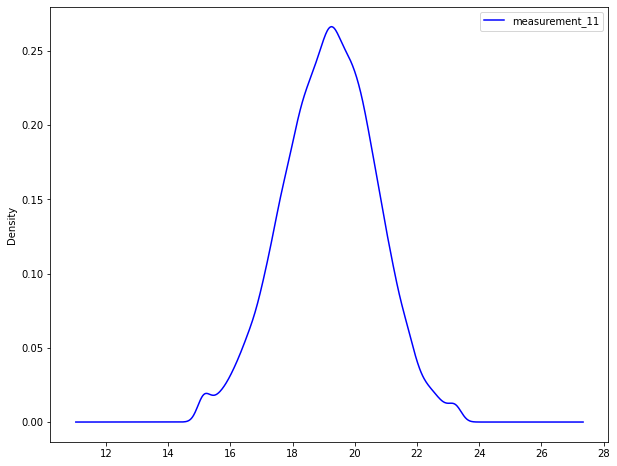

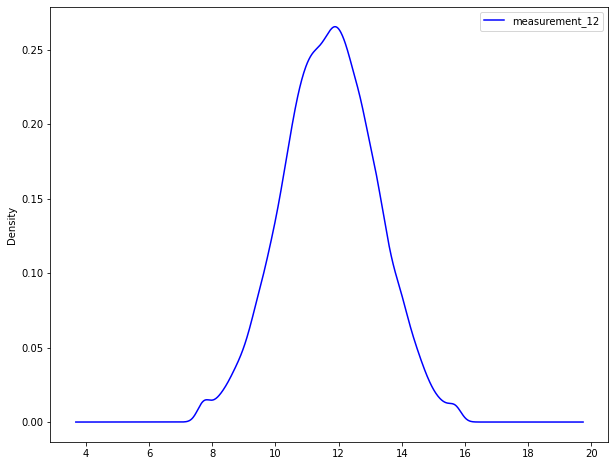

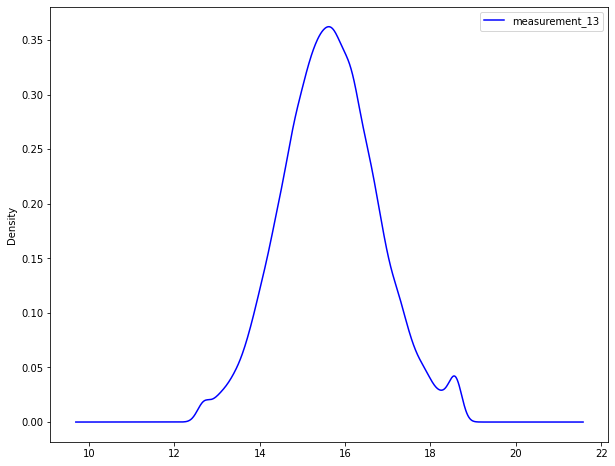

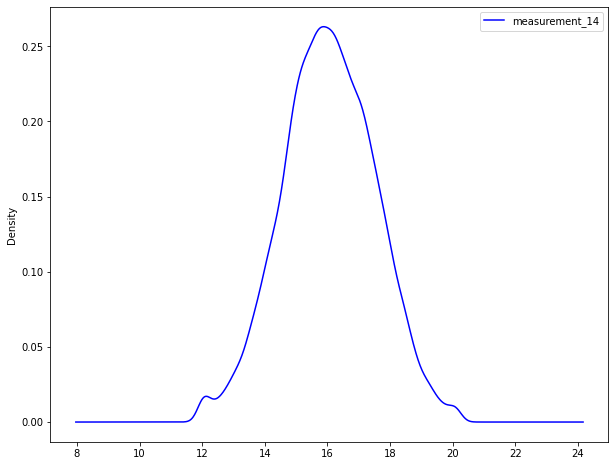

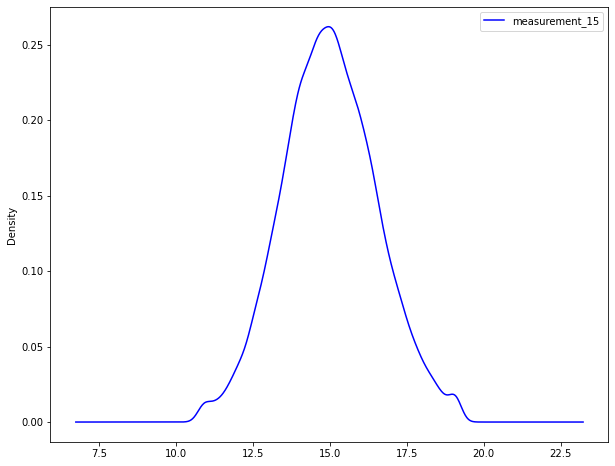

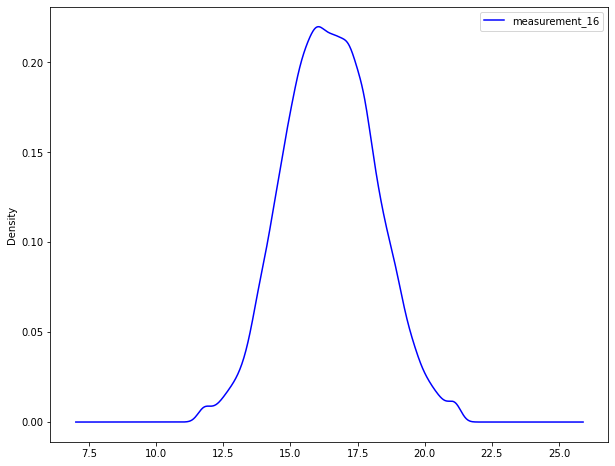

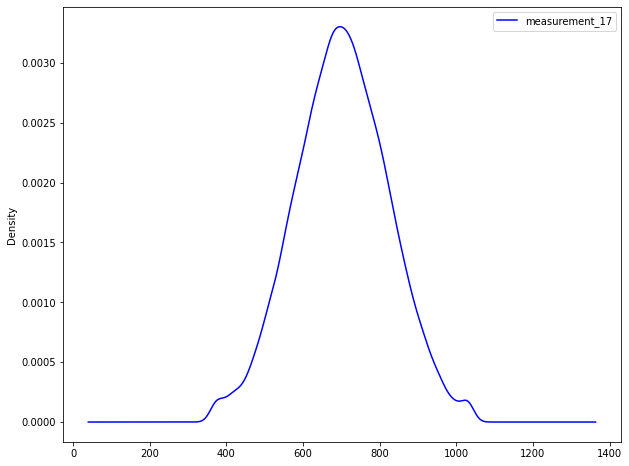

In [69]:
for i in train_num.columns:
  gaussian_distribution(train_num,i)

In [70]:
def skewness(data,column):
  for col in data.columns:
    print(col,':',data[col].skew())

In [71]:
skewness(train_num,i)

loading : 0.593540286296714
attribute_2 : 0.3817727183585202
attribute_3 : -0.4042264014354718
measurement_0 : 0.5809940631138951
measurement_1 : 0.39847209088171265
measurement_2 : 0.37274113161280487
measurement_3 : 0.0019753088028569327
measurement_4 : 0.002539464612905818
measurement_5 : 0.012682078426844113
measurement_6 : 0.0022408422024365673
measurement_7 : -0.0043142650892957985
measurement_8 : 0.007150339907015618
measurement_9 : -0.0007181753685742317
measurement_10 : -7.627124246762505e-05
measurement_11 : -0.09108440143457026
measurement_12 : -0.026510800029891844
measurement_13 : 0.1165875640163001
measurement_14 : -0.033518507665528635
measurement_15 : 0.08569810547155086
measurement_16 : 0.06138088398474006
measurement_17 : 0.0004997917363100625


In [72]:
from sklearn.preprocessing import PowerTransformer

In [73]:
def plots(data,col,pt):
  plt.figure(figsize=[8,5])
  plt.subplot(121)
  data[col].plot(kind='kde')
  plt.title('before'+str(pt).split('(')[0])
  plt.subplot(122)
  p1=pt.fit_transform(data[[col]]).flatten()
  data[col].plot(kind='kde')
  plt.title('after'+str(pt).split('(')[0])

In [74]:
#for var in train_num.columns:
  #plots(train_num,var,PowerTransformer())

In [75]:
skewness(train_num,i)

loading : 0.593540286296714
attribute_2 : 0.3817727183585202
attribute_3 : -0.4042264014354718
measurement_0 : 0.5809940631138951
measurement_1 : 0.39847209088171265
measurement_2 : 0.37274113161280487
measurement_3 : 0.0019753088028569327
measurement_4 : 0.002539464612905818
measurement_5 : 0.012682078426844113
measurement_6 : 0.0022408422024365673
measurement_7 : -0.0043142650892957985
measurement_8 : 0.007150339907015618
measurement_9 : -0.0007181753685742317
measurement_10 : -7.627124246762505e-05
measurement_11 : -0.09108440143457026
measurement_12 : -0.026510800029891844
measurement_13 : 0.1165875640163001
measurement_14 : -0.033518507665528635
measurement_15 : 0.08569810547155086
measurement_16 : 0.06138088398474006
measurement_17 : 0.0004997917363100625


In [76]:
#for var in test_num.columns:
  #plots(test_num,var,PowerTransformer())

In [77]:
df_num=pd.concat([train_num,test_num],axis=0)

In [78]:
df_num=df_num.drop_duplicates()

In [79]:
df_cat=pd.concat([train_cat,test_cat],axis=0)

In [80]:
df_cat.shape

(47345, 3)

In [81]:
df_num.shape

(47345, 21)

In [82]:
df_cat.isnull().sum()

product_code    0
attribute_0     0
attribute_1     0
dtype: int64

In [83]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
ohe=OneHotEncoder(sparse=False,dtype=np.int32,drop='first')

In [85]:
df_ohe=pd.DataFrame(ohe.fit_transform(df_cat))

In [86]:
df_ohe.columns=ohe.get_feature_names([col for col in df_cat])

In [87]:
df_ohe.shape

(47345, 12)

In [88]:
df_final=df_num.join(df_ohe)

In [89]:
df_num.isnull().sum()

loading           0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [90]:
df_ohe.isnull().sum()

product_code_B            0
product_code_C            0
product_code_D            0
product_code_E            0
product_code_F            0
product_code_G            0
product_code_H            0
product_code_I            0
attribute_0_material_7    0
attribute_1_material_6    0
attribute_1_material_7    0
attribute_1_material_8    0
dtype: int64

In [91]:
df_final.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,product_code_D,product_code_E,product_code_F,product_code_G,product_code_H,product_code_I,attribute_0_material_7,attribute_1_material_6,attribute_1_material_7,attribute_1_material_8
0,80.10,9.0,5.0,7.0,8.0,4.0,18.040,12.518,15.748,19.292,...,0,0,0,0,0,0,1,0,0,1
0,119.57,6.0,4.0,6.0,9.0,6.0,19.305,10.178,17.534,18.168,...,0,0,0,0,0,0,1,0,0,1
1,84.89,9.0,5.0,14.0,3.0,3.0,18.213,11.540,17.717,17.893,...,0,0,0,0,0,0,1,0,0,1
1,113.51,6.0,4.0,11.0,8.0,0.0,17.883,11.927,17.228,16.033,...,0,0,0,0,0,0,1,0,0,1
2,82.43,9.0,5.0,12.0,1.0,5.0,18.057,11.652,16.738,18.240,...,0,0,0,0,0,0,1,0,0,1


In [92]:
df_final.shape

(47345, 33)

In [93]:
df_final.isnull().sum()

loading                   0
attribute_2               0
attribute_3               0
measurement_0             0
measurement_1             0
measurement_2             0
measurement_3             0
measurement_4             0
measurement_5             0
measurement_6             0
measurement_7             0
measurement_8             0
measurement_9             0
measurement_10            0
measurement_11            0
measurement_12            0
measurement_13            0
measurement_14            0
measurement_15            0
measurement_16            0
measurement_17            0
product_code_B            0
product_code_C            0
product_code_D            0
product_code_E            0
product_code_F            0
product_code_G            0
product_code_H            0
product_code_I            0
attribute_0_material_7    0
attribute_1_material_6    0
attribute_1_material_7    0
attribute_1_material_8    0
dtype: int64

In [94]:
df_final.columns

Index(['loading', 'attribute_2', 'attribute_3', 'measurement_0',
       'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4',
       'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8',
       'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12',
       'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16',
       'measurement_17', 'product_code_B', 'product_code_C', 'product_code_D',
       'product_code_E', 'product_code_F', 'product_code_G', 'product_code_H',
       'product_code_I', 'attribute_0_material_7', 'attribute_1_material_6',
       'attribute_1_material_7', 'attribute_1_material_8'],
      dtype='object')

In [95]:
df_final=df_final.join(train['failure'])

In [96]:
df_final.shape

(47345, 34)

In [97]:
x=df_final.drop(columns=['failure'])
y=df_final['failure']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3)

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scale=StandardScaler()

In [102]:
x_train=scale.fit_transform(x_train)#array
x_test=scale.transform(x_test)#array

In [103]:
x_train=pd.DataFrame(x_train,columns=[col for col in x])

In [104]:
x_test=pd.DataFrame(x_test,columns=[col for col in x])

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [106]:
10.0**np.arange(-2,3)# range of values

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [107]:
#log=LogisticRegression()
#grid={'C':10.0**np.arange(-2,3),'solver':['liblinear'],'penalty':['l1','l2']}
#cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [108]:
#clf=GridSearchCV(log,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [109]:
#clf.fit(x_train,y_train)

In [110]:
#y_pred=clf.predict(x_test)
#print(confusion_matrix(y_test,y_pred))
#print(accuracy_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [112]:
feat_score=pd.Series(rf.feature_importances_,index=[col for col in x_train])
feat_score*100

loading                   5.976824
attribute_2               1.306331
attribute_3               1.460947
measurement_0             3.499374
measurement_1             3.494965
measurement_2             3.387252
measurement_3             5.314972
measurement_4             5.108436
measurement_5             5.187658
measurement_6             5.303312
measurement_7             5.209608
measurement_8             5.221661
measurement_9             5.161742
measurement_10            5.155075
measurement_11            5.338265
measurement_12            5.130636
measurement_13            5.184195
measurement_14            5.307525
measurement_15            5.168332
measurement_16            5.267365
measurement_17            5.051608
product_code_B            0.391988
product_code_C            0.457549
product_code_D            0.466411
product_code_E            0.238091
product_code_F            0.000000
product_code_G            0.000000
product_code_H            0.000000
product_code_I      

In [113]:
imp_feat=feat_score[feat_score*100>1].index.to_list()

In [114]:
x_train=x_train[imp_feat]

In [115]:
x_test=x_test[imp_feat]

In [116]:
x_train.shape,x_test.shape

((14203, 21), (33142, 21))

In [117]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [118]:
y_pred=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[26072     9]
 [ 7061     0]]
0.7866755174702794
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     26081
           1       0.00      0.00      0.00      7061

    accuracy                           0.79     33142
   macro avg       0.39      0.50      0.44     33142
weighted avg       0.62      0.79      0.69     33142



In [119]:
from sklearn.decomposition import PCA

In [120]:
pca_score=[]
for i in range(x_train.shape[1]):
  pca=PCA(n_components=15)

In [121]:
pca.fit(x_train)

PCA(n_components=15)

In [122]:
x_train_pca=pd.DataFrame(pca.transform(x_train))

In [123]:
x_test_pca=pd.DataFrame(pca.transform(x_test))

In [124]:
x_train_pca.shape,x_test_pca.shape,y_train.shape,y_test.shape

((14203, 15), (33142, 15), (14203,), (33142,))

In [125]:
rf.fit(x_train_pca,y_train)

RandomForestClassifier(random_state=0)

In [126]:
y_pred=rf.predict(x_test_pca)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[26076     5]
 [ 7057     4]]
0.786916903023354
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     26081
           1       0.44      0.00      0.00      7061

    accuracy                           0.79     33142
   macro avg       0.62      0.50      0.44     33142
weighted avg       0.71      0.79      0.69     33142



In [127]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [128]:
x_train_pca.shape, y_train.shape

((14203, 15), (14203,))

In [129]:
gb.fit(x_train_pca,y_train)

GradientBoostingClassifier()

In [130]:
y_pred=rf.predict(x_test_pca)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[26076     5]
 [ 7057     4]]
0.786916903023354
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     26081
           1       0.44      0.00      0.00      7061

    accuracy                           0.79     33142
   macro avg       0.62      0.50      0.44     33142
weighted avg       0.71      0.79      0.69     33142



In [131]:
## OVER SAMPLING

In [132]:
y.value_counts()

0    37255
1    10090
Name: failure, dtype: int64

In [133]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [195]:
os=RandomOverSampler(0.70)
x_train_os,y_train_os=os.fit_resample(x_train_pca,y_train)
print('y_train: ',Counter(y_train))
print('y_train_os: ',Counter(y_train_os))

y_train:  Counter({0: 11174, 1: 3029})
y_train_os:  Counter({0: 11174, 1: 7821})


In [196]:
gb.fit(x_train_os,y_train_os)

GradientBoostingClassifier()

In [197]:
y_pred=gb.predict(x_test_pca)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24803  1278]
 [ 6602   459]]
0.7622352302214712
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     26081
           1       0.26      0.07      0.10      7061

    accuracy                           0.76     33142
   macro avg       0.53      0.51      0.48     33142
weighted avg       0.68      0.76      0.70     33142



In [198]:
y_pred_rf=rf.predict(x_test_pca)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24803  1278]
 [ 6602   459]]
0.7622352302214712
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     26081
           1       0.26      0.07      0.10      7061

    accuracy                           0.76     33142
   macro avg       0.53      0.51      0.48     33142
weighted avg       0.68      0.76      0.70     33142



In [168]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 64 kB/s 


In [169]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [171]:
xgb=XGBClassifier()
lgb=LGBMClassifier()
cat=CatBoostClassifier()

In [199]:
xgb.fit(x_train_os,y_train_os)
lgb.fit(x_train_os,y_train_os)
cat.fit(x_train_os,y_train_os)

Learning rate set to 0.036217
0:	learn: 0.6914518	total: 10.8ms	remaining: 10.8s
1:	learn: 0.6899500	total: 20.2ms	remaining: 10.1s
2:	learn: 0.6885465	total: 30.6ms	remaining: 10.2s
3:	learn: 0.6871537	total: 41.1ms	remaining: 10.2s
4:	learn: 0.6858987	total: 50.7ms	remaining: 10.1s
5:	learn: 0.6847593	total: 69.3ms	remaining: 11.5s
6:	learn: 0.6835475	total: 79.4ms	remaining: 11.3s
7:	learn: 0.6822957	total: 89.8ms	remaining: 11.1s
8:	learn: 0.6812172	total: 100ms	remaining: 11s
9:	learn: 0.6801991	total: 110ms	remaining: 10.9s
10:	learn: 0.6791200	total: 120ms	remaining: 10.8s
11:	learn: 0.6781051	total: 130ms	remaining: 10.7s
12:	learn: 0.6773523	total: 140ms	remaining: 10.7s
13:	learn: 0.6764228	total: 151ms	remaining: 10.6s
14:	learn: 0.6756065	total: 162ms	remaining: 10.6s
15:	learn: 0.6747340	total: 172ms	remaining: 10.6s
16:	learn: 0.6740214	total: 182ms	remaining: 10.5s
17:	learn: 0.6732906	total: 200ms	remaining: 10.9s
18:	learn: 0.6726465	total: 210ms	remaining: 10.8s
19:	l

In [210]:
y_pred_xgb=xgb.predict(x_test_pca)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred))

[[24803  1278]
 [ 6602   459]]
0.7625067889686802
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     26081
           1       0.26      0.07      0.10      7061

    accuracy                           0.76     33142
   macro avg       0.53      0.51      0.48     33142
weighted avg       0.68      0.76      0.70     33142



In [211]:
y_pred_lgb=lgb.predict(x_test_pca)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred_lgb))
print(classification_report(y_test,y_pred))

[[24803  1278]
 [ 6602   459]]
0.7480538289783356
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     26081
           1       0.26      0.07      0.10      7061

    accuracy                           0.76     33142
   macro avg       0.53      0.51      0.48     33142
weighted avg       0.68      0.76      0.70     33142



In [212]:
y_pred_cat=cat.predict(x_test_pca)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred))

[[24803  1278]
 [ 6602   459]]
0.7520366906040673
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     26081
           1       0.26      0.07      0.10      7061

    accuracy                           0.76     33142
   macro avg       0.53      0.51      0.48     33142
weighted avg       0.68      0.76      0.70     33142



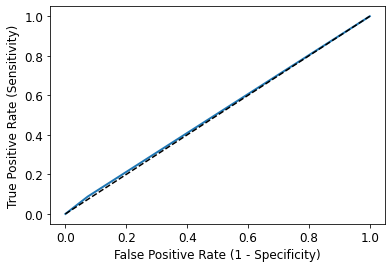

In [209]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgb)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [194]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_lgb)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5114


In [213]:
y_pred_xgb=xgb.predict(x_test_pca)
print('y_pred_xgb',y_pred_xgb)

y_pred_xgb [0 1 0 ... 0 0 0]


In [140]:
import pickle
filename='finalized_model.pkl'
pickle.dump(rf,open(filename,'wb'))

In [214]:
# Creating Sample submission file and submit
pred=pd.DataFrame(y_pred_xgb)
sub_df=pd.read_csv('sample_submission.csv')
dataset=pd.concat([sub_df['id'],pred],axis=1)
dataset.columns=['id','failure']
dataset=dataset.dropna()
dataset['id']=dataset['id'].astype('int32')
dataset.to_csv('sample_submission.csv',index=False)

In [215]:
!kaggle competitions submit -c tabular-playground-series-aug-2022 -f /content/sample_submission.csv -m "submission"

100% 162k/162k [00:00<00:00, 723kB/s]
Successfully submitted to Tabular Playground Series - Aug 2022